In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
iowa_file_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'

home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))


# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex6 import *
print("\nSetup complete")


Validation MAE when not specifying max_leaf_nodes: 29,653
Validation MAE for best value of max_leaf_nodes: 27,283

Setup complete


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor()

# fit your model
rf_model.fit(train_X, train_y)
pred = rf_model.predict(val_X)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(pred, val_y)
print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))


Validation MAE for Random Forest Model: 21890.673753424657


In [4]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=1,
    n_jobs=-1
)

rf_model.fit(train_X, train_y)
pred = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(pred, val_y)

print(f"Validation MAE for improved Random Forest: {rf_val_mae:,.0f}")


Validation MAE for improved Random Forest: 21,965


In [5]:
print(f"Decision Tree MAE: {val_mae:,.0f}")
print(f"Random Forest MAE: {rf_val_mae:,.0f}")

Decision Tree MAE: 27,283
Random Forest MAE: 21,965


In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

train_X_imputed = imputer.fit_transform(train_X)
val_X_imputed = imputer.transform(val_X)

rf_model.fit(train_X_imputed, train_y)
pred = rf_model.predict(val_X_imputed)

print(mean_absolute_error(val_y, pred))


21964.884076973256


In [7]:
# Load test data
test_data = pd.read_csv(
    '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'
)

test_X = test_data[features]

test_X_imputed = imputer.transform(test_X)

# Predict
test_preds = rf_model.predict(test_X_imputed)

# Create submission
output = pd.DataFrame({
    'Id': test_data.Id,
    'SalePrice': test_preds
})

output.to_csv('submission.csv', index=False)

print("submission.csv created successfully!")


submission.csv created successfully!


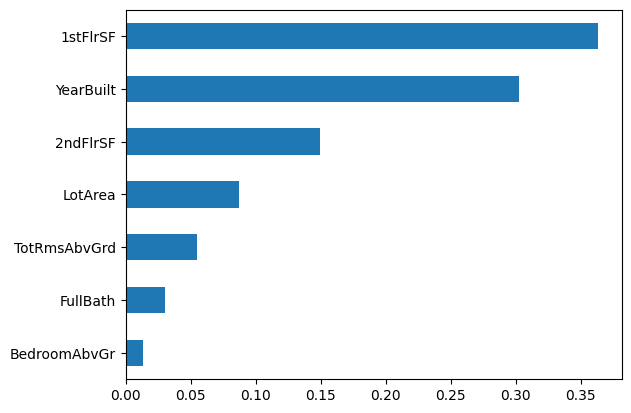

In [8]:
import matplotlib.pyplot as plt
pd.Series(rf_model.feature_importances_, index=train_X.columns)\
  .sort_values()\
  .plot(kind='barh')
plt.show()
